NCR


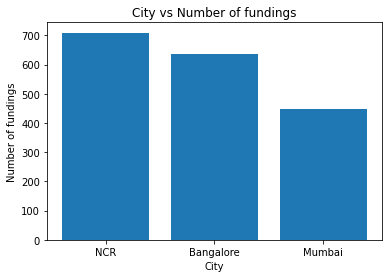

In [145]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def change(s):
    if ("delhi" in s.lower()) or ("new delhi" in s.lower()):
        return "New Delhi"
    elif "bangalore" in s.lower():
        return "Bangalore"
    elif "mumbai" in s.lower():
        return "Mumbai"
    elif "gurgaon" in s.lower():
        return "Gurgaon"
    elif "pune" in s.lower():
        return "Pune"
    elif "noida" in s.lower():
        return "Noida"
    return s

data = pd.read_csv("startup_funding.csv")
data = data[(data["CityLocation"].notnull())]
city = data["CityLocation"]
city.dropna()
city = np.array(city)


citydict = {"Bangalore":0, "Mumbai": 0, "NCR":0}
for j in city:
    tarr = str(j).split("/")
    for i in tarr:
        i = change(i)
        if i == "Bangalore":
            citydict["Bangalore"] += 1
        elif i =="Mumbai":
            citydict["Mumbai"] += 1
        elif (i == "New Delhi") or (i == "Gurgaon") or (i == "Noida"):
            citydict["NCR"] += 1
            
citydict = sorted(citydict.items(), key = lambda item: item[1], reverse = True)
x = []
y = []
for i in citydict:
    x.append(i[0])
    y.append(i[1])

plt.xlabel("City")
plt.ylabel("Number of fundings")
plt.title("City vs Number of fundings")
plt.bar(x,y)
print(x[0])

Sequoia Capital 64
Accel Partners 53
Kalaari Capital 44
SAIF Partners 41
Indian Angel Network 40


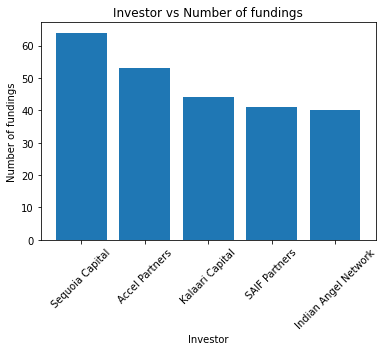

In [146]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("D:\Codes\Jupyter\Case studies/startup_funding.csv")
investor = data.InvestorsName
investor = investor.dropna()
investor = np.array(investor)

investordict = {}
for i in investor:
    tarr = i.split(",")
    for j in tarr:
        j = j.strip()
        if j in investordict:
            investordict[j] += 1
        else:
            investordict[j] = 1
            
investordict = list(sorted(investordict.items(), key = lambda item: item[1], reverse = True))
x = []
y = []

for i in investordict[0:5]:
    x.append(i[0])
    y.append(i[1])

plt.bar(x,y)
plt.xticks(rotation = 45)
for i in range(5):
    print(investordict[i][0], investordict[i][1])
    
plt.xlabel("Investor")
plt.ylabel("Number of fundings")
plt.title("Investor vs Number of fundings")
plt.show()

Sequoia Capital 48
Accel Partners 47
Kalaari Capital 41
Indian Angel Network 40
Blume Ventures 36


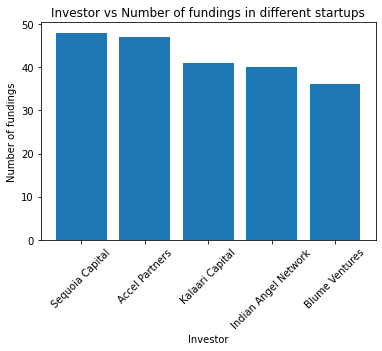

In [147]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def company(s):
    if "oyofit" in s.lower():
        return s
    if "flipkart" in s.lower():
        s = "Flipkart"
    elif "oyo" in s.lower():
        s = "Oyo"
    elif "Ola" in s:
        s = "Ola"
    elif "Paytm" in s:
        s = "Paytm"
    return s

data = pd.read_csv("D:\Codes\Jupyter\Case studies/startup_funding.csv")
data = data[pd.notnull(data.InvestorsName)]
data.reset_index(inplace=True, drop=True)

idict = {}
for i in range(data.InvestorsName.size):
    investor = data.loc[i, "InvestorsName"]
    startup = data.loc[i, "StartupName"]
    startup = company(startup)
    tarr = investor.split(",")
    for j in tarr:
        j = j.strip()
        if j in idict:
            idict[j].add(startup)
        else:
            idict[j] = {startup}
            
for i in idict:
    idict[i] = len(idict[i])
idict[''] = 0
idict = list(sorted(idict.items(), key = lambda item: item[1], reverse = True))

x = []
y = []

for i in idict[0:5]:
    x.append(i[0])
    y.append(i[1])

plt.bar(x,y)
plt.xticks(rotation = 45)
for i in range(5):
    print(idict[i][0], idict[i][1])
    
plt.xlabel("Investor")
plt.ylabel("Number of fundings")
plt.title("Investor vs Number of fundings in different startups")
plt.show()

Indian Angel Network 33
Rajan Anandan 23
LetsVenture 16
Anupam Mittal 16
Kunal Shah 14


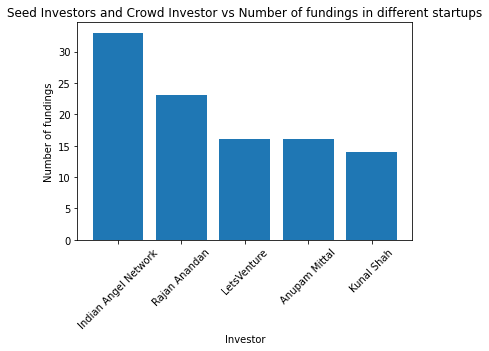

In [148]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def helper(s):
    if s == "SeedFunding":
        s = "Seed Funding"
    elif s ==  "PrivateEquity":
        s =  "Private Equity"
    elif s == "Crowd funding":
        s = "Crowd Funding"
    return s

def company(s):
    if "oyofit" in s.lower():
        return s
    if "flipkart" in s.lower():
        s = "Flipkart"
    elif "oyo" in s.lower():
        s = "Oyo"
    elif "Ola" in s:
        s = "Ola"
    elif "Paytm" in s:
        s = "Paytm"
    return s


data = pd.read_csv("D:\Codes\Jupyter\Case studies/startup_funding.csv")
itype = data.InvestmentType
itype = itype.apply(helper)
data.InvestmentType = itype
data = data[data.InvestmentType != 'Private Equity']
data = data[data.InvestmentType != 'Debt Funding']

data = data[pd.notnull(data.InvestorsName)]
data.reset_index(inplace=True, drop=True)

idict = {}
for i in range(data.InvestorsName.size):
    investor = data.loc[i, "InvestorsName"]
    startup = data.loc[i, "StartupName"]
    startup = company(startup)
    tarr = investor.split(",")
    for j in tarr:
        j = j.strip()
        if j in idict:
            idict[j].add(startup)
        else:
            idict[j] = {startup}
for i in idict:
    idict[i] = len(idict[i])

idict['Undisclosed Investors'] = 0
idict['Undisclosed investors'] = 0
idict[''] = 0

idict = list(sorted(idict.items(), key = lambda item: item[1], reverse = True))
x = []
y = []

for i in idict[0:5]:
    x.append(i[0])
    y.append(i[1])

plt.bar(x,y)
plt.xticks(rotation = 45)
for i in range(5):
    print(idict[i][0], idict[i][1])
    
plt.xlabel("Investor")
plt.ylabel("Number of fundings")
plt.title("Seed Investors and Crowd Investor vs Number of fundings in different startups")

plt.show()

Sequoia Capital 45
Accel Partners 43
Kalaari Capital 35
Blume Ventures 27
SAIF Partners 24


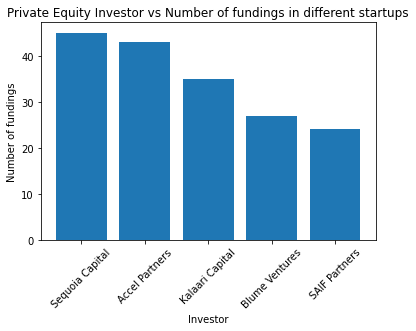

In [149]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def helper(s):
    if s == "SeedFunding":
        s = "Seed Funding"
    elif s ==  "PrivateEquity":
        s =  "Private Equity"
    elif s == "Crowd funding":
        s = "Crowd Funding"
    return s

def company(s):
    if "flipkart" in s.lower():
        s = "Flipkart"
    elif "oyo" in s.lower():
        s = "Oyo"
    elif "Ola" in s:
        s = "Ola"
    elif "Paytm" in s:
        s = "Paytm"
    return s


data = pd.read_csv("D:\Codes\Jupyter\Case studies/startup_funding.csv")
itype = data.InvestmentType
itype = itype.apply(helper)
data.InvestmentType = itype
data = data[data.InvestmentType == 'Private Equity']

data = data[pd.notnull(data.InvestorsName)]
data.reset_index(inplace=True, drop=True)

idict = {}
for i in range(data.InvestorsName.size):
    investor = data.loc[i, "InvestorsName"]
    startup = data.loc[i, "StartupName"]
    startup = company(startup)
    tarr = investor.split(",")
    for j in tarr:
        j = j.strip()
        if j in idict:
            idict[j].add(startup)
        else:
            idict[j] = {startup}
for i in idict:
    idict[i] = len(idict[i])

idict['Undisclosed Investors'] = 0
idict['Undisclosed investors'] = 0
idict[''] = 0


idict = sorted(idict.items(), key = lambda item: item[1], reverse = True)

x = []
y = []

for i in idict[0:5]:
    x.append(i[0])
    y.append(i[1])

plt.bar(x,y)
plt.xticks(rotation = 45)
for i in range(5):
    print(idict[i][0], idict[i][1])

plt.xlabel("Investor")
plt.ylabel("Number of fundings")
plt.title("Private Equity Investor vs Number of fundings in different startups")

plt.show()